<a href="https://colab.research.google.com/github/Madhu132006/classify_digits.py/blob/main/classify_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        82
           1       0.87      0.92      0.90        89
           2       0.94      0.92      0.93        83
           3       0.97      0.84      0.90        93
           4       0.99      0.98      0.98        93
           5       0.98      0.88      0.93        99
           6       0.99      0.98      0.98        98
           7       0.91      0.99      0.95        87
           8       0.81      0.86      0.83        83
           9       0.82      0.88      0.85        92

    accuracy                           0.92       899
   macro avg       0.92      0.92      0.92       899
weighted avg       0.93      0.92      0.92       899



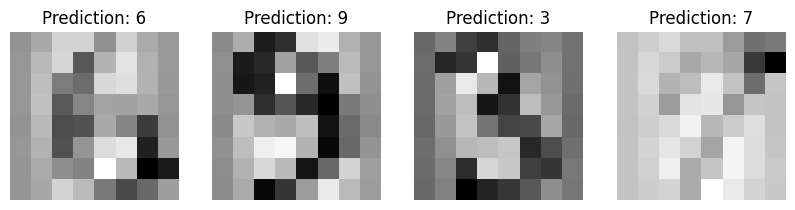

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = datasets.load_digits()

# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

# Evaluate the classifier
print(f"Classification report:\n{metrics.classification_report(y_test, predicted)}")

# Display some of the test images along with their predicted labels
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

plt.show()